# Pandas

[Pandas](http://pandas.pydata.org) is a Python Data Analysis library. It is an open source library that brings data structures and data analysis tools to the Python programming language. It defines the a set of labelled array data structures to Python:

1. **Series** - One-dimensioned homogeneously typed labelled array
2. **TimeSeries** - Series with index containing dates
2. **DataFrame** - A general two-dimensioned labelled array with potentially heterogeneously typed columns. It is a fast and efficient data structure for data manipulation with integrated indexing.
3. **Panel** - A general three-dimensioned labelled array

In addition, it adds several tools for reading and writing data. It is frequently used to read, clean, align, filter data.

## Series

**Series** is a one-dimensional labelled array capable of holding any data type.

a = [ 0.1  1.2  2.3  3.4  4.5]

0    0.1
1    1.2
2    2.3
3    3.4
4    4.5
dtype: float64

0    0.1
1    1.2
2    2.3
3    3.4
4    4.5
dtype: float64

a    0.1
b    1.2
c    2.3
d    3.4
e    4.5
dtype: float64


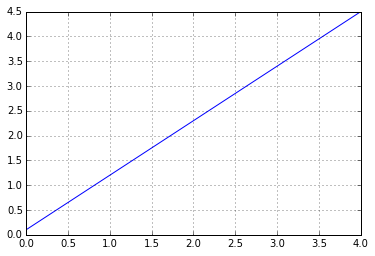

In [2]:
%matplotlib inline

import numpy as np
from pandas import Series

a = np.array([0.1, 1.2, 2.3, 3.4, 4.5])
print 'a =', a
print
s = Series([0.1, 1.2, 2.3, 3.4, 4.5])
print s
print
s1 = Series(a)
print s1
print
s2 = Series(a, index=['a', 'b', 'c', 'd', 'e'])
print s2
s1.plot()

In [3]:
print "s2['a'] =", s2['a']
print 's2[0] =', s2[0]
print "s2[['a', 'c']] =", s2[['a', 'c']]
print "s2[[0, 2]] =", s2[[0, 2]]
print "s2[s2 > 2] =", s2[s2 > 2]
s3 = Series([0.1, 1.2, 2.3, 3.4, 4.5])
print s3
s3.index = ['a', 'b', 'c', 'd', 'e']
print s3

s2['a'] = 0.1
s2[0] = 0.1
s2[['a', 'c']] = a    0.1
c    2.3
dtype: float64
s2[[0, 2]] = a    0.1
c    2.3
dtype: float64
s2[s2 > 2] = c    2.3
d    3.4
e    4.5
dtype: float64
0    0.1
1    1.2
2    2.3
3    3.4
4    4.5
dtype: float64
a    0.1
b    1.2
c    2.3
d    3.4
e    4.5
dtype: float64


In [4]:
s3.head()

a    0.1
b    1.2
c    2.3
d    3.4
e    4.5
dtype: float64

In [5]:
s3.describe()

count    5.000000
mean     2.300000
std      1.739253
min      0.100000
25%      1.200000
50%      2.300000
75%      3.400000
max      4.500000
dtype: float64

In [6]:
summary = s3.describe()
print summary
print "Mean =", summary['mean']

count    5.000000
mean     2.300000
std      1.739253
min      0.100000
25%      1.200000
50%      2.300000
75%      3.400000
max      4.500000
dtype: float64
Mean = 2.3


## DataFrame

In [7]:
from pandas import DataFrame

a = np.array([[1.0, 2], [3, 4]])
df = DataFrame(a)
print df

   0  1
0  1  2
1  3  4


In [8]:
df = DataFrame(np.array([[1, 2], [3, 4]]), columns=['a', 'b'])
print(df)

   a  b
0  1  2
1  3  4


In [9]:
df = DataFrame(np.array([[1, 2], [3, 4]]))
df.columns = ['dogs', 'cats']
print df

   dogs  cats
0     1     2
1     3     4


In [10]:
s1 = Series(np.arange(0.0, 5))
s2 = Series(np.arange(1.0, 6))
print s1
print s2
DataFrame({'a': s1, 'b': s2})

0    0
1    1
2    2
3    3
4    4
dtype: float64
0    1
1    2
2    3
3    4
4    5
dtype: float64


,a,b
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [12]:
s3 = Series(np.arange(0.0, 3))
print s3
DataFrame({'a': s1, 'b':s2, 'c': s3})

0    0
1    1
2    2
dtype: float64


AttributeError: 'pandas.index.Int64Engine' object has no attribute 'is_monotonic_increasing'

In [ ]:
df1 = DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
print df1
df2 = DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
print df2

In [ ]:
df3 = df1 + df2
print df3
print df1 - df1.iloc[0]

## Reading and Writing Data in Text Format

There are several functions available in Pandas to read and write data in different text formats:

* **`read_csv`**: Load delimited data from a file, URL or file like object. Use comma as default delimiter
* **`read_table`**: Load delimited data from a file, URL or file like object. Use **`\t`** as default delimiter
* **`read_fwf`**: Read data in fixed-width column format (that is, no delimiters)
* **`read_clipboard`**: Version of **`read_table`** that reads data from the clipboard. Useful for converting tables from web pages

In [ ]:
from pandas import read_csv

df = read_csv('world.csv')
print df.columns
print df

## Reading and Writing Data in Binary Format

## Reading Microsoft Excel Files



In [ ]:
from pandas import ExcelFile

xlFile = ExcelFile('india_steel.xls')
print xlFile.sheet_names
df = xlFile.parse("Sheet1")
print df

# PandaSql

**PandaSql** performs SQL operations on data stored in memory as a **DataFrame**. This makes it a versatile tool to perform a variety of search, sort, add, delete or modify operations on data stored in a DataFrame.

### PandaSql Example - Design of Connections in Steel Structures

Properties of Indian Standard steel sections from SP:6(1) have been typed into a Microsoft Excel 2003 file named **india_steel.xls**. We will read the data from this file into program memory, and perform SQL queries on it.
from pandasql import sqldf

In [13]:
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

q = """SELECT Name, w, AX FROM df WHERE Name LIKE '%s%%' AND Ax > 15 ORDER BY AX LIMIT 3""" % ('ISMB')
print q
sec = pysqldf(q)
print "Type = ", type(sec), "\n", sec

SELECT Name, w, AX FROM df WHERE Name LIKE 'ISMB%' AND Ax > 15 ORDER BY AX LIMIT 3
Type =  <type 'NoneType'> 
None


In [14]:
print sec.Name
s1 = sec.loc[0]
print s1
print "Type =", type(s1)
print s1['Name'], s1['w'], s1['AX']
print s1.Name, s1.w, s1.AX

AttributeError: 'NoneType' object has no attribute 'Name'

In [15]:
from pandas import read_csv

df = read_csv('parasite_data.csv', na_values=[" "])
print df

     Virulence  Replicate  ShannonDiversity
0          0.5          1          0.059262
1          0.5          2          1.093600
2          0.5          3          1.139390
3          0.5          4          0.547651
4          0.5          5          0.065928
5          0.5          6          1.344330
6          0.5          7          1.680480
7          0.5          8          0.000000
8          0.5          9          2.047680
9          0.5         10          0.000000
10         0.5         11          1.507140
11         0.5         12          0.000000
12         0.5         13          1.589810
13         0.5         14          1.144800
14         0.5         15          1.011190
15         0.5         16          0.000000
16         0.5         17          0.776665
17         0.5         18          0.001749
18         0.5         19          1.761200
19         0.5         20          0.021091
20         0.5         21          0.790915
21         0.5         22       

Retrieve the CSV file from this URL (Your computer must be connected to the Internet)

https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv

In [1]:
from __future__ import division, print_function
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df

,PLAYER,SALARY,GP,G,A,SOT,PPG,P
0,Sergio Agüero\n Forward — Manchester City,$19.2m,16.0,14,3.0,34,13.12,209.98
1,Eden Hazard\n Midfield — Chelsea,$18.9m,21.0,8,4.0,17,13.05,274.04
2,Alexis Sánchez\n Forward — Arsenal,$17.6m,NaN,12,7.0,29,11.19,223.86
3,Yaya Touré\n Midfield — Manchester City,$16.6m,18.0,7,1.0,19,10.99,197.91
4,Ángel Di María\n Midfield — Manchester United,$15.0m,13.0,3,NaN,13,10.17,132.23
5,Santiago Cazorla\n Midfield — Arsenal,$14.8m,20.0,4,NaN,20,9.97,NaN
6,David Silva\n Midfield — Manchester City,$14.3m,15.0,6,2.0,11,10.35,155.26
7,Cesc Fàbregas\n Midfield — Chelsea,$14.0m,20.0,2,14.0,10,10.47,209.49
8,Saido Berahino\n Forward — West Brom,$13.8m,21.0,9,0.0,20,7.02,147.43
9,Steven Gerrard\n Midfield — Liverpool,$13.8m,20.0,5,1.0,11,7.50,150.01


In [2]:
for c in df.columns:
    print(c, c.lower())
df.columns = [c.lower() for c in df.columns]
df.tail(3)
print(type(df.columns), df.columns)
print(df.columns[0])
print(df.columns[1])

PLAYER player
SALARY salary
GP gp
G g
A a
SOT sot
PPG ppg
P p
<class 'pandas.indexes.base.Index'> Index([u'player', u'salary', u'gp', u'g', u'a', u'sot', u'ppg', u'p'], dtype='object')
player
salary


In [3]:
df['salary'] = df['salary'].apply(lambda x: x.strip('$m'))
df.tail()

,player,salary,gp,g,a,sot,ppg,p
5,Santiago Cazorla\n Midfield — Arsenal,14.8,20.0,4,NaN,20,9.97,NaN
6,David Silva\n Midfield — Manchester City,14.3,15.0,6,2.0,11,10.35,155.26
7,Cesc Fàbregas\n Midfield — Chelsea,14.0,20.0,2,14.0,10,10.47,209.49
8,Saido Berahino\n Forward — West Brom,13.8,21.0,9,0.0,20,7.02,147.43
9,Steven Gerrard\n Midfield — Liverpool,13.8,20.0,5,1.0,11,7.50,150.01
